# Load in and Clean Data

In [1]:
###
# Part 1
###
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('data_sets/CreditCard.csv')

# Drop rows with any `null` values or empty strings
df = df.replace('', pd.NA).dropna()
df = df.reset_index(drop=True)

# Encode Values In Data Sets
df['Gender'] = df['Gender'].map({'M': 1, 'F': 0})
df['CarOwner'] = df['CarOwner'].map({'Y': 1, 'N': 0})
df['PropertyOwner'] = df['PropertyOwner'].map({'Y': 1, 'N': 0})

# Drop the Ind_ID
df = df.drop(columns=['Ind_ID'])

# Display the first few rows of the DataFrame
print(df.head())
print('Number of rows =',len(df))

###
# Part 2
###

# Get X and y values
y = df['CreditApprove']
X = df.drop(columns=['CreditApprove']) 


   CreditApprove  Gender  CarOwner  PropertyOwner  #Children  WorkPhone  \
0              1       1         1              1          0          0   
1              1       0         1              0          0          1   
2              1       0         1              0          0          1   
3              1       0         1              0          0          1   
4              1       0         1              0          0          1   

   Email_ID  
0         0  
1         0  
2         0  
3         0  
4         0  
Number of rows = 339


# Hill Climbing Search Algorithm

Step 0 = [-1, -1, -1, -1, -1, -1]
Step 1 = [-1, -1, 1, -1, -1, -1]
Step 2 = [1, -1, 1, -1, -1, -1]
Step 3 = [1, -1, 1, -1, 1, -1]
Step 4 = [1, -1, 1, -1, 1, 1]
Optimized w (hill climbing local search) = [1, -1, 1, -1, 1, 1]
Optimized er(w) = 1.2713864306784661


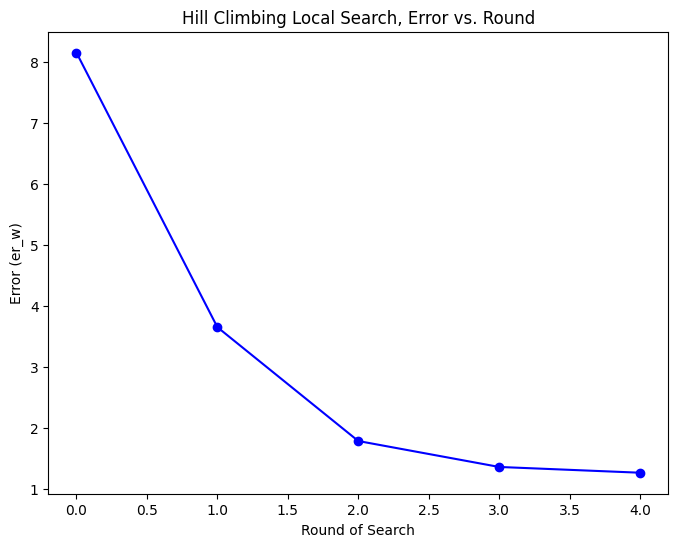

In [6]:
w = [-1, -1, -1, -1, -1, -1]

def find_er_w(w):
    fx = [0] * len(X)
    er_w_sum = 0
    for i in range(len(X)):
        for j in range(len(X.columns)):
            fx[i] += w[j] * X.iloc[i,j]
        er_w_sum += (fx[i] - y[i])**2
    er_w = er_w_sum  / len(X)
    return er_w

import copy
import matplotlib.pyplot as plt

def hill_climbing_local_search(w, threshold=1000):
    er_w_trasformations = []
    rounds = []
    min_found = False
    for i in range(threshold):
        print("Step",i,"=",w)
        current_er_w = find_er_w(w)

        er_w_trasformations.append(current_er_w)
        rounds.append(i)

        # Find adjacent solutions (so for each weight in w, flip the value)
        # Example: Have [1,1,1,1,1,1]
        # Result: Test [-1,1,1,1,1,1], [1,-1,1,1,1,1], etc.
        er_w_prime_best = 10 # 10 is greater than 1 * 6
        best_w_prime = []
        for j in range(len(X.columns)):
            w_prime = copy.deepcopy(w)
            w_prime[j] *= -1
            er_w_prime = find_er_w(w_prime)
            if er_w_prime < er_w_prime_best:
                er_w_prime_best = er_w_prime
                best_w_prime = w_prime

        if er_w_prime_best < current_er_w:
            w = best_w_prime
        else:
            print('Optimized w (hill climbing local search) =', w)
            print('Optimized er(w) =', current_er_w)
            min_found = True
            break
    if not min_found:
        print('Best so far w (hill climbing local search) =', w)
        print('Best so far er(w) =', current_er_w)

    plt.figure(figsize=(8,6))
    plt.plot(rounds, er_w_trasformations, marker='o', linestyle='-', color='b', label='Error')
    plt.xlabel('Round of Search')
    plt.ylabel('Error (er_w)')
    plt.title('Hill Climbing Local Search, Error vs. Round')
    plt.show()
    # return w

hill_climbing_local_search([-1,-1,-1,-1,-1,-1])

# Genetic Search Algorithm

For run 1
Current w's in population = [array([-1, -1, -1,  1, -1,  1]), array([-1,  1,  1,  1,  1,  1])]
Best w in population currently = [-1 -1 -1  1 -1  1]
Best w of all time = 1.2713864306784661
Best er(w) of all time = [ 1 -1  1 -1  1  1]

For run 2
Current w's in population = [array([-1, -1,  1, -1,  1,  1]), array([-1,  1,  1, -1, -1, -1])]
Best w in population currently = [-1 -1  1 -1  1  1]
Best w of all time = 1.2713864306784661
Best er(w) of all time = [ 1 -1  1 -1  1  1]

For run 3
Current w's in population = [array([ 1,  1,  1,  1, -1,  1]), array([ 1,  1,  1, -1,  1,  1])]
Best w in population currently = [ 1  1  1  1 -1  1]
Best w of all time = 1.2713864306784661
Best er(w) of all time = [ 1 -1  1 -1  1  1]

For run 4
Current w's in population = [array([ 1, -1, -1,  1,  1, -1]), array([ 1,  1, -1,  1,  1,  1])]
Best w in population currently = [ 1  1 -1  1  1  1]
Best w of all time = 1.2713864306784661
Best er(w) of all time = [ 1 -1  1 -1  1  1]

For run 5
Current w's in

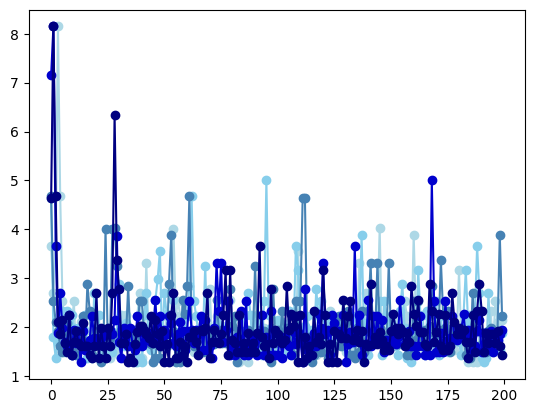

In [29]:
import numpy as np

# Like find_er_w in hw2_local.py, just faster because numpy
def find_er_w(w):
    X_np = X.to_numpy() 
    y_np = y.to_numpy()
    
    # Calculate fx = X * w
    fx = np.dot(X_np, w)
    
    # Calculate er_w_sum = (fx - y)^2 summed over all samples
    er_w_sum = np.sum((fx - y_np) ** 2)
    
    # Calculate er_w
    er_w = er_w_sum / len(X_np)
    
    return er_w

import math
import matplotlib.pyplot as plt
import random

def fitness(w):
    return math.exp(-find_er_w(w))

def genetic_search(w, population_size=2, threshold=200, color='r', debug=False):
    population = [w] * population_size
    rounds = []
    er_w_trasformations = []
    all_time_best_er = 10
    all_time_best_w = []

    for generation in range(threshold):
        fitnesses = np.array([fitness(w) for w in population])
        rounds.append(generation)
        new_population = []

        for chromosome in range(population_size):
            probabilities = (fitnesses / sum(fitnesses)) # More fit = Higher Probability

            parent1 = random.choices(population, weights=probabilities, k=1)[0]
            parent2 = random.choices(population, weights=probabilities, k=1)[0]

            # Crossover
            crossover = np.append(parent1[:3], parent2[3:])

            # Mutation change 1 random variable in each crossover
            random_index = np.random.randint(0, len(crossover))
            crossover[random_index] *= -1


            if debug:
                print("Generation:", generation, "| Chromosome", chromosome, "| Crossover", crossover)
            new_population.append(crossover)


        population = new_population

        generation_er_ws = np.array([find_er_w(w) for w in population])
        fitnesses_of_pop = np.array([fitness(w) for w in population])

        min_w_idx = np.argmin(generation_er_ws) 
        if generation_er_ws[min_w_idx] < all_time_best_er:
            all_time_best_er = generation_er_ws[min_w_idx]
            all_time_best_w = population[min_w_idx]

        er_w_trasformations.append(min(generation_er_ws))


    min_w_idx = np.argmin(fitnesses_of_pop) 
    curr_w = population[min_w_idx]

    if debug:
        print("Current w's in population =", population)
        print('Best w in population currently =', curr_w)
        print('Best w of all time =', all_time_best_er)
        print('Best er(w) of all time =', all_time_best_w)


    plt.figure(figsize=(8,6))
    plt.xlabel('Round of Search')
    plt.ylabel('Error (er_w)')
    plt.title('Generation Search for 5 Complete Runs, Error vs. Round')
    plt.close()
    plt.plot(rounds, er_w_trasformations, marker='o', linestyle='-', color=color, label='Error')
        
    return population, curr_w, all_time_best_er, all_time_best_w

population = [0] * 5
curr_w = [0] * 5
all_time_best_er = [0] * 5
all_time_best_w = [0] * 5

population[0], curr_w[0], all_time_best_er[0], all_time_best_w[0] = genetic_search(w, color='#ADD8E6')
population[1], curr_w[1], all_time_best_er[1], all_time_best_w[1] = genetic_search(w, color='#87CEEB')
population[2], curr_w[2], all_time_best_er[2], all_time_best_w[2] = genetic_search(w, color='#4682B4')
population[3], curr_w[3], all_time_best_er[3], all_time_best_w[3] = genetic_search(w, color='#0000CD')
population[4], curr_w[4], all_time_best_er[4], all_time_best_w[4] = genetic_search(w, color='#000080')

for i in range(5):
    print("For run", i+1)
    print("Current w's in population =", population[i])
    print('Best w in population currently =', curr_w[i])
    print('Best w of all time =', all_time_best_er[i])
    print('Best er(w) of all time =', all_time_best_w[i])
    print()


plt.show()